# Scaling and encoding

In [15]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### 1. Numerical : Scaling

We first select all the numerical columns and scale them.

In [35]:
df = pd.read_csv('df_recommender_cleaned.csv') 


In [3]:
numerical = df.select_dtypes(include = np.number)


In [4]:
numerical.head()

,rating,pages,publishDate,numRatings,price,5*,4*,3*,2*,1*
0,4.33,374,2008,6376780,5.09,3444695,1921313,745221,171994,93557
1,4.50,870,2004,2507623,7.38,1593642,637516,222366,39573,14526
2,3.60,501,2006,4964519,2.10,1751460,1113682,1008686,542017,548674
3,4.37,552,2006,1834276,3.80,1048230,524674,186297,48864,26211
4,3.95,141,1996,2740713,4.42,986764,958699,545475,165093,84682


In [5]:
from sklearn.preprocessing import MinMaxScaler
numerical_scaled = MinMaxScaler().fit_transform(numerical)
numerical_scaled = pd.DataFrame(numerical_scaled, columns=numerical.columns)

In [6]:
numerical_scaled

,rating,pages,publishDate,numRatings,price,5*,4*,3*,2*,1*
0,0.866,0.025310,0.639053,1.000000,0.004734,1.000000,1.000000,0.738804,0.317322,0.170515
1,0.900,0.058875,0.615385,0.393243,0.007284,0.462637,0.331813,0.220451,0.073011,0.026475
2,0.720,0.033904,0.627219,0.778531,0.001403,0.508451,0.579646,1.000000,1.000000,1.000000
3,0.874,0.037355,0.627219,0.287649,0.003297,0.304303,0.273081,0.184693,0.090152,0.047772
4,0.790,0.009542,0.568047,0.429796,0.003988,0.286459,0.498981,0.540778,0.304590,0.154339
...,...,...,...,...,...,...,...,...,...,...
34949,0.828,0.028152,0.656805,0.000336,0.005246,0.000274,0.000373,0.000362,0.000144,0.000071
34950,0.832,0.024362,0.668639,0.000161,0.020428,0.000128,0.000200,0.000141,0.000089,0.000022
34951,0.740,0.018948,0.656805,0.001047,0.007273,0.000612,0.000972,0.001646,0.001194,0.000711
34952,0.770,0.034310,0.656805,0.000037,0.002250,0.000022,0.000041,0.000058,0.000035,0.000009


### 2. Categorical : One Hot Encoding

Then we enconde the categorical columns

In [8]:
categorical = df.select_dtypes(include = object)

In [12]:
for col in categorical.columns:
    print(col)
    print(len(categorical[col].unique()))

title
33650
series
2
author
15673
language
48
genres
32135
bookFormat
84
publisher
6249
awards
2


Here we can see that there are too many unique values in the columns 'title', 'author' and 'publisher' so we don't keep it. We're gonna treat the genres in a different way.

In [13]:
categorical.language.value_counts()

English                        32690
Spanish                          488
French                           470
German                           406
Italian                          171
Portuguese                       140
Dutch                             95
Turkish                           92
Japanese                          69
Arabic                            61
Polish                            39
Indonesian                        27
Greek, Modern (1453-)             19
Russian                           18
Swedish                           16
Persian                           13
Serbian                           11
Finnish                           11
Multiple languages                11
Bengali                           11
Romanian                           9
Danish                             7
Filipino; Pilipino                 7
Catalan; Valencian                 6
Czech                              5
Lithuanian                         5
Vietnamese                         5
B

For the language we gonna keep as it is only the ones who have more than 50 values and group the the others in 'Other'.

In [16]:
threshold = 50
counts = categorical['language'].value_counts()
categorical['language'] = categorical['language'].apply(lambda x: 'Other' if counts[x] < threshold else x)

In [17]:
categorical.language.value_counts()

English       32690
Spanish         488
French          470
German          406
Other           272
Italian         171
Portuguese      140
Dutch            95
Turkish          92
Japanese         69
Arabic           61
Name: language, dtype: int64

In [18]:
categorical.bookFormat.value_counts()

Paperback                21397
Hardcover                10328
Mass Market Paperback     2332
Kindle Edition             379
ebook                       72
                         ...  
capa mole                    1
Rústica                      1
Bìa mềm                      1
Brochura                     1
Gebunden                     1
Name: bookFormat, Length: 84, dtype: int64

Most of the books are 'Paperback' or 'Hardcover'. We don't keep this column for the clustering.

In [19]:
categorical = categorical.drop(columns=['title', 'bookFormat','author','publisher','genres'])

In [20]:
categorical.head()

,series,language,awards
0,Yes,English,Yes
1,Yes,English,Yes
2,Yes,English,Yes
3,No,English,Yes
4,No,English,Yes


In [21]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categorical)
cols = encoder.get_feature_names_out(input_features=categorical.columns) 
categorical_encoded = pd.DataFrame(encoder.transform(categorical).toarray(),columns=cols) 

In [22]:
categorical_encoded.head()

,series_Yes,language_Dutch,language_English,language_French,language_German,language_Italian,language_Japanese,language_Other,language_Portuguese,language_Spanish,language_Turkish,awards_Yes
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 3. Genres encoding

In [36]:
# First we remove the quotation marks and the square brackets
df['genres']=df['genres'].str.replace('\[','')
df['genres']=df['genres'].str.replace('\]','')
df['genres']=df['genres'].str.replace('\'','')

# Then we clean up the 'genres' column by stripping leading and trailing spaces
df['genres'] = df['genres'].str.strip()

# Then, we split the 'genres' column into a list of individual genres
df['genres'] = df['genres'].apply(lambda x: [genre.strip() for genre in x.split(',')])

# We create a set of unique genre labels
unique_genres = set(genre for genres_list in df['genres'] for genre in genres_list)

# After this, we create a DataFrame 'genres_encoded' with columns for each unique genre
genres_encoded = pd.DataFrame()

# Finaly, we encode the genres and add columns to 'genres_encoded'
for genre in unique_genres:
    genres_encoded[genre] = df['genres'].apply(lambda x: 1 if genre in x else 0)

In [37]:
genres_encoded

,,Hackers,Field Guides,Classic Literature,Dark,Cookbooks,Slash Fiction,Back To School,Love Story,Indian Literature,...,Health,Magick,Georgian,Forgotten Realms,High Fantasy,Nutrition,Dc Comics,Christian Historical Fiction,Cooking,Cthulhu Mythos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34949,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here we have too many columns so we will only keep the top 100 genres.

In [39]:
top_100_columns = genres_encoded.sum().nlargest(100).index
genres_encoded_top_100 = genres_encoded[top_100_columns]

In [40]:
genres_encoded_top_100

,Fiction,Fantasy,Romance,Young Adult,Contemporary,Nonfiction,Historical Fiction,Mystery,Novels,Audiobook,...,Roman,Picture Books,Womens,Comic Book,Queer,Erotica,Asia,Business,Fairy Tales,German Literature
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34949,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
34950,0,0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
34951,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34952,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Clustering

Having already made several attempts with different clusters, we've realized that certain books in the 'Childrens' genre, such as 'Harry Potter', can end up with children's books containing only pictures. To avoid this, we're going to remove first the column 'Picture books' and then the books with the 'Picture Books' genre.

In [57]:
# We create the new dafaframe for the clustering
df_cluster = pd.concat((numerical_scaled, categorical_encoded, genres_encoded_top_100),axis=1)

In [59]:
picture_books = df_cluster[(df_cluster['Picture Books']==1)]

In [60]:
picture_books

,rating,pages,publishDate,numRatings,price,5*,4*,3*,2*,1*,...,Roman,Picture Books,Womens,Comic Book,Queer,Erotica,Asia,Business,Fairy Tales,German Literature
7,0.874,0.004331,0.970414,0.142036,0.004489,0.161449,0.106358,0.094002,0.051567,0.040959,...,0,1,0,0,0,0,0,0,0,0
33,0.844,0.002504,0.591716,0.128111,0.003152,0.126176,0.107713,0.115642,0.066557,0.041236,...,0,1,0,0,0,0,0,0,0,0
34,0.860,0.004196,0.520710,0.096699,0.002384,0.100310,0.080286,0.083560,0.038370,0.021426,...,0,1,0,0,0,0,0,0,0,0
65,0.868,0.009813,0.597633,0.042402,0.004968,0.044069,0.038315,0.033379,0.013147,0.007607,...,0,1,0,0,0,0,0,0,0,0
83,0.860,0.001759,0.556213,0.062118,0.001760,0.066195,0.047254,0.052663,0.027769,0.016638,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34834,0.792,0.003925,0.603550,0.000553,0.000679,0.000367,0.000564,0.000975,0.000304,0.000053,...,0,1,0,0,0,0,0,0,0,0
34855,0.844,0.001624,0.591716,0.002802,0.005190,0.002697,0.002330,0.003144,0.001218,0.000492,...,0,1,0,0,0,0,0,0,0,0
34868,0.790,0.002166,0.568047,0.000066,0.006728,0.000043,0.000075,0.000094,0.000048,0.000013,...,0,1,0,0,0,0,0,0,0,0
34874,0.834,0.001353,0.609467,0.000685,0.003319,0.000604,0.000651,0.000778,0.000360,0.000104,...,0,1,0,0,0,0,0,0,0,0


In [61]:
rows_to_delete = df_cluster[df_cluster.isin(picture_books.to_dict(orient='list')).all(axis=1)].index


In [62]:
df_cluster = df_cluster.drop(rows_to_delete)

In [63]:
df_cluster

,rating,pages,publishDate,numRatings,price,5*,4*,3*,2*,1*,...,Roman,Picture Books,Womens,Comic Book,Queer,Erotica,Asia,Business,Fairy Tales,German Literature
0,0.866,0.025310,0.639053,1.000000,0.004734,1.000000,1.000000,0.738804,0.317322,0.170515,...,0,0,0,0,0,0,0,0,0,0
1,0.900,0.058875,0.615385,0.393243,0.007284,0.462637,0.331813,0.220451,0.073011,0.026475,...,0,0,0,0,0,0,0,0,0,0
2,0.720,0.033904,0.627219,0.778531,0.001403,0.508451,0.579646,1.000000,1.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.874,0.037355,0.627219,0.287649,0.003297,0.304303,0.273081,0.184693,0.090152,0.047772,...,0,0,0,0,0,0,0,0,0,0
4,0.790,0.009542,0.568047,0.429796,0.003988,0.286459,0.498981,0.540778,0.304590,0.154339,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34949,0.828,0.028152,0.656805,0.000336,0.005246,0.000274,0.000373,0.000362,0.000144,0.000071,...,0,0,0,0,0,0,0,0,0,0
34950,0.832,0.024362,0.668639,0.000161,0.020428,0.000128,0.000200,0.000141,0.000089,0.000022,...,0,0,0,0,0,0,0,0,0,0
34951,0.740,0.018948,0.656805,0.001047,0.007273,0.000612,0.000972,0.001646,0.001194,0.000711,...,0,0,0,0,0,0,0,0,0,0
34952,0.770,0.034310,0.656805,0.000037,0.002250,0.000022,0.000041,0.000058,0.000035,0.000009,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df_cluster = df_cluster.drop(columns=['Picture Books'])

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

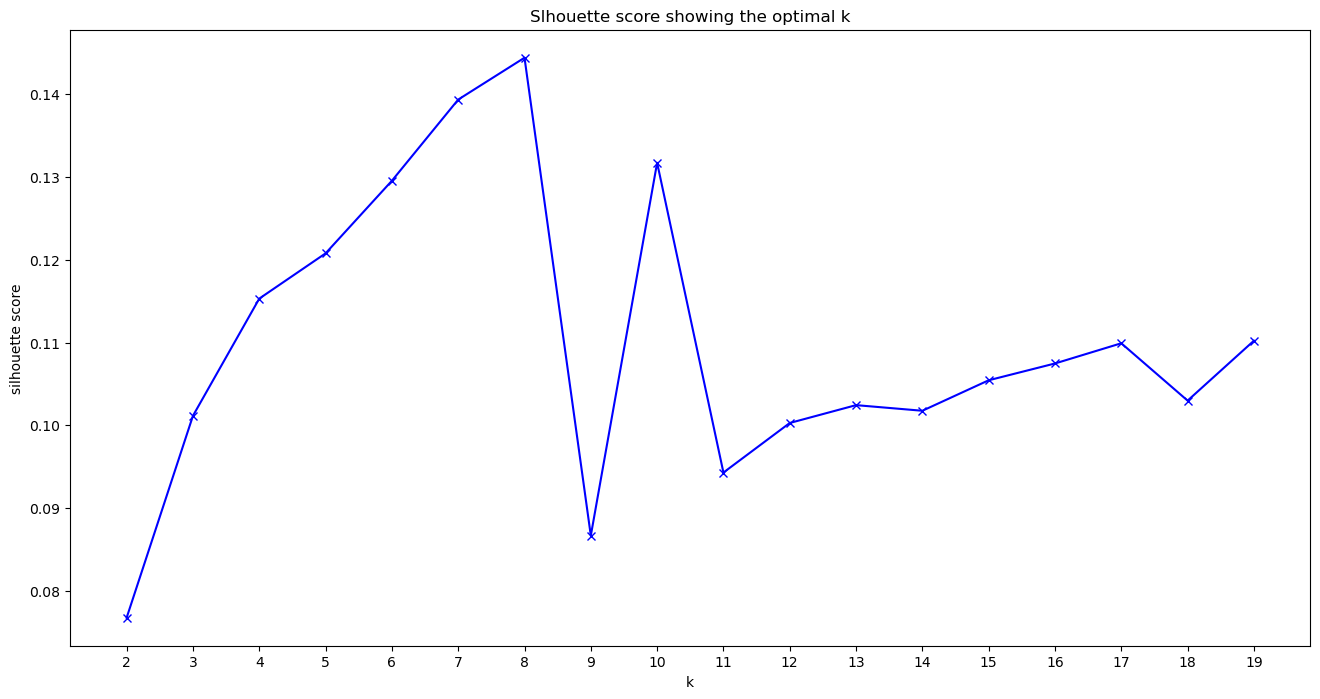

In [65]:
# We chose the best K with the silhouette score

import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_cluster)
    silhouette.append(silhouette_score(df_cluster, kmeans.predict(df_cluster)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')


Here we can see that the best k is 8 so we're going to create 8 clusters.

In [66]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(df_cluster)

KMeans(random_state=1234)

In [67]:
clusters = kmeans.predict(df_cluster)
pd.Series(clusters).value_counts().sort_index()

0    2961
1    9097
2    4376
3    2872
4    3252
5    4934
6    3747
7    3122
dtype: int64

In [68]:
clusters_series = pd.Series(clusters, name='cluster')

In [82]:
# Before creating the new dataframe with the cluster column, 
# we need to drop the book with 'Picture Books' genre from the main dateframe and reset the indexes
indices_to_drop = list(picture_books.index)
df_no_picture_books = df.drop(indices_to_drop).reset_index()

In [83]:
df_no_picture_books

,index,title,series,author,rating,language,genres,bookFormat,pages,publisher,publishDate,awards,numRatings,price,5*,4*,3*,2*,1*
0,0,The Hunger Games,Yes,Suzanne Collins,4.33,English,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Hardcover,374,Scholastic Press,2008,Yes,6376780,5.09,3444695,1921313,745221,171994,93557
1,1,Harry Potter and the Order of the Phoenix,Yes,J.K. Rowling,4.50,English,"[Fantasy, Young Adult, Fiction, Magic, Childre...",Paperback,870,Scholastic Inc.,2004,Yes,2507623,7.38,1593642,637516,222366,39573,14526
2,2,Twilight,Yes,Stephenie Meyer,3.60,English,"[Young Adult, Fantasy, Romance, Vampires, Fict...",Paperback,501,"Little, Brown and Company",2006,Yes,4964519,2.10,1751460,1113682,1008686,542017,548674
3,3,The Book Thief,No,Markus Zusak,4.37,English,"[Historical Fiction, Fiction, Young Adult, His...",Hardcover,552,Alfred A. Knopf,2006,Yes,1834276,3.80,1048230,524674,186297,48864,26211
4,4,Animal Farm,No,George Orwell,3.95,English,"[Classics, Fiction, Dystopia, Fantasy, Literat...",Mass Market Paperback,141,Signet Classics,1996,Yes,2740713,4.42,986764,958699,545475,165093,84682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34356,34949,Attracted to Fire,No,DiAnn Mills,4.14,English,"[Christian Fiction, Christian, Suspense, Roman...",Paperback,416,Tyndale House Publishers,2011,Yes,2143,5.55,945,716,365,78,39
34357,34950,Unbelievable,Yes,Sherry Gammon,4.16,English,"[Romance, Young Adult, Contemporary, Contempor...",Paperback,360,Wordpaintings Unlimited,2013,No,1028,19.18,442,384,142,48,12
34358,34951,Marked,Yes,Kim Richardson,3.70,English,"[Fantasy, Young Adult, Paranormal, Angels, Rom...",Paperback,280,CreateSpace,2011,Yes,6674,7.37,2109,1868,1660,647,390
34359,34952,Wayward Son,No,Tom Pollack,3.85,English,"[Fiction, Mystery, Historical Fiction, Adventu...",Paperback,507,Cascada Productions,2011,No,238,2.86,77,78,59,19,5


In [84]:
# We create a new dataframe with the cluster column
df_clustered = pd.concat([df_no_picture_books, clusters_series], axis=1)

In [85]:
df_clustered

,index,title,series,author,rating,language,genres,bookFormat,pages,publisher,publishDate,awards,numRatings,price,5*,4*,3*,2*,1*,cluster
0,0,The Hunger Games,Yes,Suzanne Collins,4.33,English,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Hardcover,374,Scholastic Press,2008,Yes,6376780,5.09,3444695,1921313,745221,171994,93557,5
1,1,Harry Potter and the Order of the Phoenix,Yes,J.K. Rowling,4.50,English,"[Fantasy, Young Adult, Fiction, Magic, Childre...",Paperback,870,Scholastic Inc.,2004,Yes,2507623,7.38,1593642,637516,222366,39573,14526,3
2,2,Twilight,Yes,Stephenie Meyer,3.60,English,"[Young Adult, Fantasy, Romance, Vampires, Fict...",Paperback,501,"Little, Brown and Company",2006,Yes,4964519,2.10,1751460,1113682,1008686,542017,548674,7
3,3,The Book Thief,No,Markus Zusak,4.37,English,"[Historical Fiction, Fiction, Young Adult, His...",Hardcover,552,Alfred A. Knopf,2006,Yes,1834276,3.80,1048230,524674,186297,48864,26211,4
4,4,Animal Farm,No,George Orwell,3.95,English,"[Classics, Fiction, Dystopia, Fantasy, Literat...",Mass Market Paperback,141,Signet Classics,1996,Yes,2740713,4.42,986764,958699,545475,165093,84682,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34356,34949,Attracted to Fire,No,DiAnn Mills,4.14,English,"[Christian Fiction, Christian, Suspense, Roman...",Paperback,416,Tyndale House Publishers,2011,Yes,2143,5.55,945,716,365,78,39,0
34357,34950,Unbelievable,Yes,Sherry Gammon,4.16,English,"[Romance, Young Adult, Contemporary, Contempor...",Paperback,360,Wordpaintings Unlimited,2013,No,1028,19.18,442,384,142,48,12,6
34358,34951,Marked,Yes,Kim Richardson,3.70,English,"[Fantasy, Young Adult, Paranormal, Angels, Rom...",Paperback,280,CreateSpace,2011,Yes,6674,7.37,2109,1868,1660,647,390,7
34359,34952,Wayward Son,No,Tom Pollack,3.85,English,"[Fiction, Mystery, Historical Fiction, Adventu...",Paperback,507,Cascada Productions,2011,No,238,2.86,77,78,59,19,5,4


In [88]:
df_clustered = df_clustered.drop(columns=['index'])


In [89]:
df_clustered 

,title,series,author,rating,language,genres,bookFormat,pages,publisher,publishDate,awards,numRatings,price,5*,4*,3*,2*,1*,cluster
0,The Hunger Games,Yes,Suzanne Collins,4.33,English,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Hardcover,374,Scholastic Press,2008,Yes,6376780,5.09,3444695,1921313,745221,171994,93557,5
1,Harry Potter and the Order of the Phoenix,Yes,J.K. Rowling,4.50,English,"[Fantasy, Young Adult, Fiction, Magic, Childre...",Paperback,870,Scholastic Inc.,2004,Yes,2507623,7.38,1593642,637516,222366,39573,14526,3
2,Twilight,Yes,Stephenie Meyer,3.60,English,"[Young Adult, Fantasy, Romance, Vampires, Fict...",Paperback,501,"Little, Brown and Company",2006,Yes,4964519,2.10,1751460,1113682,1008686,542017,548674,7
3,The Book Thief,No,Markus Zusak,4.37,English,"[Historical Fiction, Fiction, Young Adult, His...",Hardcover,552,Alfred A. Knopf,2006,Yes,1834276,3.80,1048230,524674,186297,48864,26211,4
4,Animal Farm,No,George Orwell,3.95,English,"[Classics, Fiction, Dystopia, Fantasy, Literat...",Mass Market Paperback,141,Signet Classics,1996,Yes,2740713,4.42,986764,958699,545475,165093,84682,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34356,Attracted to Fire,No,DiAnn Mills,4.14,English,"[Christian Fiction, Christian, Suspense, Roman...",Paperback,416,Tyndale House Publishers,2011,Yes,2143,5.55,945,716,365,78,39,0
34357,Unbelievable,Yes,Sherry Gammon,4.16,English,"[Romance, Young Adult, Contemporary, Contempor...",Paperback,360,Wordpaintings Unlimited,2013,No,1028,19.18,442,384,142,48,12,6
34358,Marked,Yes,Kim Richardson,3.70,English,"[Fantasy, Young Adult, Paranormal, Angels, Rom...",Paperback,280,CreateSpace,2011,Yes,6674,7.37,2109,1868,1660,647,390,7
34359,Wayward Son,No,Tom Pollack,3.85,English,"[Fiction, Mystery, Historical Fiction, Adventu...",Paperback,507,Cascada Productions,2011,No,238,2.86,77,78,59,19,5,4


# Recommender

In [98]:
def recommend_books(user_input, data=df_clustered):
    """
    Recommends books from the same cluster as the user-input book, excluding books that contain the user input.

    Parameters:
    - data: DataFrame with 'title' and 'cluster' columns.
    - user_input: User's book input.

    Returns:
    - recommendations: DataFrame with the 50 top-rated recommended books.
    """

    # Convert both the user input and the 'title' column to lowercase for case-insensitive comparison
    user_input_lower = user_input.lower()
    data['title_lower'] = data['title'].str.lower()

    # Check if the user input is present in the lowercase 'title' column
    user_book = data[data['title_lower'].str.contains(user_input_lower)]

    if user_book.empty:
        return "Sorry, there's no recommendation for this book."

    # Extract the cluster of the user's book
    user_cluster = user_book['cluster'].iloc[0]

    # Filter books from the same cluster, excluding books that contain the user input
    cluster_books = data[(data['cluster'] == user_cluster) & (~data['title_lower'].str.contains(user_input_lower))]

    return cluster_books.sort_values(by='rating', ascending=False).head(50)

In [90]:
user_input = input("Enter a book title : ")

Enter a book title : harry potter


In [99]:
print("Recommendations from the same cluster:")
recommend_books(user_input)

Recommendations from the same cluster:


,title,series,author,rating,language,genres,bookFormat,pages,publisher,publishDate,awards,numRatings,price,5*,4*,3*,2*,1*,cluster,title_lower
4229,The Warden and the Wolf King,Yes,Andrew Peterson,4.75,English,"[Fantasy, Fiction, Christian, Young Adult, Chr...",Hardcover,519,Rabbit Room Press,2014,Yes,4234,47.16,3361,717,122,24,10,3,the warden and the wolf king
16416,Death Sets Sail,Yes,Robin Stevens,4.70,English,"[Mystery, Middle Grade, Historical Fiction, Hi...",Paperback,400,Puffin,2020,No,736,8.32,556,143,33,2,2,3,death sets sail
5945,Warriors Boxed Set,Yes,Erin Hunter,4.68,English,"[Fantasy, Cats, Animals, Middle Grade, Young A...",Paperback,1056,HarperCollins,2006,No,1943,11.58,1526,266,120,13,18,3,warriors boxed set
6623,The Life and Times of Scrooge McDuck,Yes,Don Rosa,4.67,English,"[Comics, Graphic Novels, Fiction, Graphic Nove...",Paperback,266,Gemstone Publishing,2005,Yes,3527,85.65,2650,651,178,30,18,3,the life and times of scrooge mcduck
9842,"Ellana, la Prophétie",Yes,Pierre Bottero,4.67,French,"[Fantasy, France, Young Adult, Fiction, Roman,...",Paperback,620,Rageot,2008,No,1991,17.29,1504,361,97,22,7,3,"ellana, la prophétie"
6617,"Ellana, l'Envol",Yes,Pierre Bottero,4.67,French,"[Fantasy, France, Young Adult, Fiction, Roman,...",Paperback,449,Rageot,2008,No,2149,12.54,1608,408,106,19,8,3,"ellana, l'envol"
4933,The Monster in the Hollows,Yes,Andrew Peterson,4.66,English,"[Fantasy, Fiction, Christian, Young Adult, Chr...",Paperback,348,Rabbit Room Press,2011,No,5076,22.77,3642,1176,210,38,10,3,the monster in the hollows
23995,Chronicles of Ancient Darkness Complete Boxed Set,Yes,Michelle Paver,4.66,English,"[Fantasy, Childrens, Middle Grade, Fiction]",Hardcover,6,Orion Children's Books,2010,No,498,483.48,367,100,25,6,0,3,chronicles of ancient darkness complete boxed set
27386,The Roald Dahl Collection,No,Roald Dahl,4.65,English,"[Childrens, Fiction, Classics, Fantasy, Advent...",Paperback,0,Penguin USA (P),2006,No,934,29.48,699,168,52,8,7,3,the roald dahl collection
5985,Darkstalker,Yes,Tui T. Sutherland,4.63,English,"[Fantasy, Dragons, Middle Grade, Fiction, Chil...",Hardcover,400,Scholastic Press,2016,No,6791,10.10,4971,1299,385,77,59,3,darkstalker
